# Data overview

## Import library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import CSV

In [2]:

df_dataset1 = pd.read_csv('dataset1.csv')
df_dataset2 = pd.read_csv('dataset2.csv')

## Dataset 1

## Dataframe Information Dataset 1

In [3]:
df_dataset1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [4]:
df_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB


## Convert to a proper date time format (datetime64)

In [5]:
datetime_cols = ['start_time', 
                 'rat_period_start', 
                 'rat_period_end', 
                 'sunset_time']

for col in datetime_cols:
    df_dataset1[col] = pd.to_datetime(df_dataset1[col], dayfirst=True)

# Display the info to verify the changes
df_dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 907 non-null    datetime64[ns]
 1   bat_landing_to_food        907 non-null    float64       
 2   habit                      866 non-null    object        
 3   rat_period_start           907 non-null    datetime64[ns]
 4   rat_period_end             907 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  907 non-null    int64         
 6   risk                       907 non-null    int64         
 7   reward                     907 non-null    int64         
 8   month                      907 non-null    int64         
 9   sunset_time                907 non-null    datetime64[ns]
 10  hours_after_sunset         907 non-null    float64       
 11  season                     907 non-null    int64         
dtypes: datet

## Create the rat_duration_seconds column

In [6]:
# Create the new column using your DataFrame variable
df_dataset1['rat_duration_seconds'] = (df_dataset1['rat_period_end'] - df_dataset1['rat_period_start']).dt.total_seconds()

# Display the first 5 rows to check the result
print(df_dataset1[['rat_period_start', 'rat_period_end', 'rat_duration_seconds']].head())

     rat_period_start      rat_period_end  rat_duration_seconds
0 2017-12-30 18:35:00 2017-12-30 18:38:00                 180.0
1 2017-12-30 19:50:00 2017-12-30 19:55:00                 300.0
2 2017-12-30 19:50:00 2017-12-30 19:55:00                 300.0
3 2017-12-30 19:50:00 2017-12-30 19:55:00                 300.0
4 2017-12-30 19:50:00 2017-12-30 19:55:00                 300.0


## Missing Values

In [7]:
df_dataset1.isnull().sum()

start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
rat_duration_seconds          0
dtype: int64

In [8]:
# habit column check
df_dataset1['habit'].unique()

array(['rat', 'fast', 'pick', 'bat_fight', 'rat_and_no_food', nan,
       'rat_and_others', 'pick_and_others', 'gaze', 'pick_rat', 'bat',
       'both', 'pick_bat',
       '94.0,305.0,239.0,416.0; 364.8,139.3,462.3,241.3', 'rat attack',
       'attack_rat', 'bat_and_rat', 'rat_attack', 'other_bats',
       'rat_pick', 'rat_and_bat', 'bowl_out', 'other_bat',
       '373.0,80.0,504.0,148.0; 274.6,110.7,382.4,267.3', 'other',
       '245.6,179.5,321.4,314.0; 522.4,0.3,592.0,95.5', 'eating',
       'rat_to_bat', 'other_bats/rat',
       '405.6,112.3,513.1,215.4; 464.1,197.7,614.9,334.3; 511.5,301.1,639.4,388.9',
       'pick_and_all', 'bat_and_pick', 'bat_fight_and_pick',
       '187.0,152.0,304.0,240.0; 567.9,88.6,621.1,140.3',
       '44.0,77.0,157.0,240.0; 253.0,96.0,346.0,147.0',
       '397.7,159.7,580.2,330.5; 252.0,92.0,346.0,149.0', 'pick_and_bat',
       '218.0,171.0,381.0,269.0; 239.0,106.0,315.0,155.0',
       '423.0,155.9,535.6,370.9; 238.0,99.0,314.0,160.0',
       'eating_and

## Clean the number = unknow

In [9]:
# First, ensure all entries in the column are treated as strings
df_dataset1['habit'] = df_dataset1['habit'].astype(str)

# Define a function to clean the 'habit' column
def clean_habit(behavior):
  # Check if any character in the string is a letter
  if any(char.isalpha() for char in behavior):
    return behavior  # If yes, keep the original value
  else:
    return 'Unknown' # If no, replace it with 'Unknown'

# Apply this function to the entire 'habit' column
df_dataset1['habit'] = df_dataset1['habit'].apply(clean_habit)

# --- Verification ---
# Let's check the unique values again to see our changes
print("--- Unique values in 'habit' column after cleaning ---")
print(df_dataset1['habit'].unique())

--- Unique values in 'habit' column after cleaning ---
['rat' 'fast' 'pick' 'bat_fight' 'rat_and_no_food' 'nan' 'rat_and_others'
 'pick_and_others' 'gaze' 'pick_rat' 'bat' 'both' 'pick_bat' 'Unknown'
 'rat attack' 'attack_rat' 'bat_and_rat' 'rat_attack' 'other_bats'
 'rat_pick' 'rat_and_bat' 'bowl_out' 'other_bat' 'other' 'eating'
 'rat_to_bat' 'other_bats/rat' 'pick_and_all' 'bat_and_pick'
 'bat_fight_and_pick' 'pick_and_bat' 'eating_and_bat_and_pick'
 'bat_figiht' 'bat_pick_rat' 'rat_pick_and_bat' 'pick_and_rat' 'fight_rat'
 'all_pick' 'no_food' 'bats' 'others' 'rat_and_pick' 'pick_rat_bat'
 'bat_and_pick_far' 'fast_far' 'fight' 'bat_rat_pick' 'bat_pick'
 'rat_disappear' 'eating_bat_rat_pick' 'fast_and_pick' 'other directions'
 'bat_fight_rat' 'bat_rat' 'pup_and_mon' 'pick_eating_all' 'pick_bat_rat'
 'rat_bat' 'rat_bat_fight' 'eating_bat_pick' 'pick_rat_and_bat'
 'fight_bat' 'bat_fight_and_rat' 'rat_and_rat' 'not_sure_rat'
 'rat_and_bat_and_pick']


## Grouping Categories

Conflict: For any direct, aggressive interactions.

Vigilance: For cautious behaviors, like watching or avoiding.

Foraging: For any normal food-gathering action.

Other: For everything else that doesn't fit.

In [10]:
# The more complete mapping dictionary
behavior_map = {
    # --- Map to 'Conflict' ---
    'bat_fight': 'Conflict', 'rat_attack': 'Conflict', 'attack_rat': 'Conflict', 'fight_rat': 'Conflict',
    'bat_figiht': 'Conflict', 'bat_fight_rat': 'Conflict', 'fight': 'Conflict', 'rat_bat_fight': 'Conflict',
    'fight_bat': 'Conflict', 'bat_fight_and_rat': 'Conflict', 'rat attack': 'Conflict',

    # --- Map to 'Foraging' ---
    'pick': 'Foraging', 'pick_bat': 'Foraging', 'pick_rat': 'Foraging', 'all_pick': 'Foraging',
    'eating': 'Foraging', 'fast': 'Foraging', 'pick_and_all': 'Foraging', 'rat_pick': 'Foraging',
    'bat_and_pick': 'Foraging', 'bat_fight_and_pick': 'Foraging', 'pick_and_bat': 'Foraging',
    'eating_and_bat_and_pick': 'Foraging', 'bat_pick_rat': 'Foraging', 'rat_pick_and_bat': 'Foraging',
    'pick_and_rat': 'Foraging', 'rat_and_pick': 'Foraging', 'pick_rat_bat': 'Foraging',
    'bat_and_pick_far': 'Foraging', 'fast_far': 'Foraging', 'bat_rat_pick': 'Foraging', 'bat_pick': 'Foraging',
    'eating_bat_rat_pick': 'Foraging', 'fast_and_pick': 'Foraging', 'pick_eating_all': 'Foraging',
    'pick_bat_rat': 'Foraging', 'eating_bat_pick': 'Foraging', 'pick_rat_and_bat': 'Foraging',
    'rat_and_bat_and_pick': 'Foraging',

    # --- Map to 'Vigilance' ---
    'gaze': 'Vigilance', 'rat': 'Vigilance', 'rat_disappear': 'Vigilance', 'rat_and_no_food': 'Vigilance',
    'rat_and_others': 'Vigilance', 'pick_and_others': 'Vigilance', 'bat_and_rat': 'Vigilance',
    'rat_and_bat': 'Vigilance', 'rat_to_bat': 'Vigilance', 'bat_rat': 'Vigilance', 'rat_bat': 'Vigilance',
    'rat_and_rat': 'Vigilance',

    # --- Map to 'Other' ---
    'other': 'Other', 'others': 'Other', 'Unknown': 'Other', 'both': 'Other', 'pup_and_mon': 'Other',
    'bat': 'Other', 'other_bats': 'Other', 'bowl_out': 'Other', 'other_bat': 'Other', 'other_bats/rat': 'Other',
    'no_food': 'Other', 'bats': 'Other', 'other directions': 'Other', 'not_sure_rat': 'Other'
}

# Overwrite the 'habit_clean' column with the fully mapped behaviors
# Note: We are using .map() here which is great for this task.
# It will automatically mark anything not in our dictionary as 'NaN', so we fill those with 'Other'.
df_dataset1['habit_clean'] = df_dataset1['habit'].map(behavior_map).fillna('Other')


# --- Final Verification ---
# If our map is complete, this list should be very small and clean!
print("--- Final unique values in 'habit_clean' ---")
print(df_dataset1['habit_clean'].unique())

--- Final unique values in 'habit_clean' ---
['Vigilance' 'Foraging' 'Conflict' 'Other']


## The most common behaviors in Habits

In [11]:
df_dataset1['habit'].value_counts()

habit
fast                245
rat                 221
pick                139
nan                  41
bat                  30
                   ... 
bat_pick_rat          1
rat_pick_and_bat      1
pick_rat_bat          1
bat_and_pick_far      1
other                 1
Name: count, Length: 66, dtype: int64

## Filling Missing Values in Habits

In [12]:
df_dataset1['habit'].fillna('Unknown', inplace=True)
df_dataset1['habit'].value_counts()

habit
fast                245
rat                 221
pick                139
nan                  41
bat                  30
                   ... 
bat_pick_rat          1
rat_pick_and_bat      1
pick_rat_bat          1
bat_and_pick_far      1
other                 1
Name: count, Length: 66, dtype: int64

## Exploratory Data Analysis (EDA)

### Q1: "Does bat behavior change when the risk of a rat is high?" using the relation between risk(0 = low risk, 1 = high risk) and habits

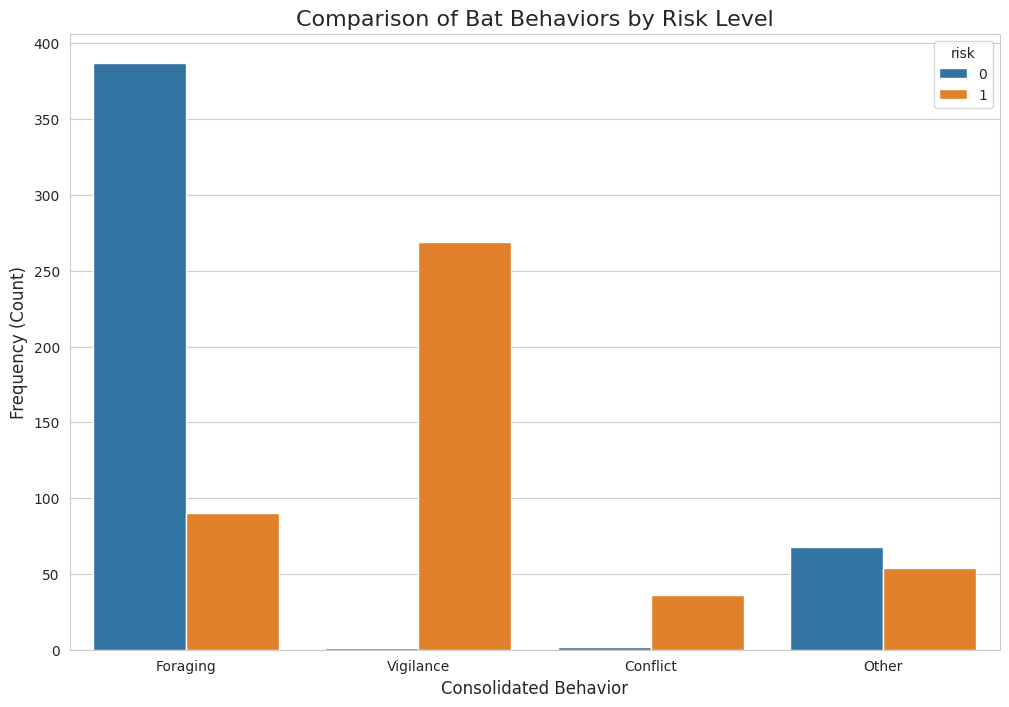

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Create the Final Plot ---

# Set a visually appealing style for the chart
sns.set_style("whitegrid")

# Create a 'figure' to draw on, and set its size
plt.figure(figsize=(12, 8))

# The main function to create the bar chart using our clean data
sns.countplot(data=df_dataset1, x='habit_clean', hue='risk', 
              order=['Foraging', 'Vigilance', 'Conflict', 'Other'])

# --- Add Finishing Touches ---

# Add a title to the chart to explain what it shows
plt.title('Comparison of Bat Behaviors by Risk Level', fontsize=16)

# Add labels to the x and y axes
plt.xlabel('Consolidated Behavior', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)

# Display the final chart
plt.show()

Foraging Behavior
Look at the Foraging category on the left.

In low-risk situations (blue bar risk = 0), the bats are foraging a lot—the count is nearly 400. This is their normal, primary activity.

However, in high-risk situations (orange bar risk = 1), foraging activity plummets dramatically to less than 100.

Conclusion: When rats are near, bats almost stop trying to eat.

Vigilance Behavior
Now look at the Vigilance category.

In low-risk situations (blue bar), there is practically zero vigilant behavior.

But in high-risk situations (orange bar), vigilance becomes the dominant behavior, with a count of over 250.

Conclusion: When rats are present, bats stop eating and start watching.

Conflict Behavior
Finally, look at the Conflict category.

This behavior only occurs in high-risk situations (orange bar). It never happens when the risk is low.

Conclusion: Bats only engage in conflict when rats are present.

## New hypothesis: "When rats are present (high risk), bats will be more hesitant and take longer to land on the food source."

### Analyze Landing Time

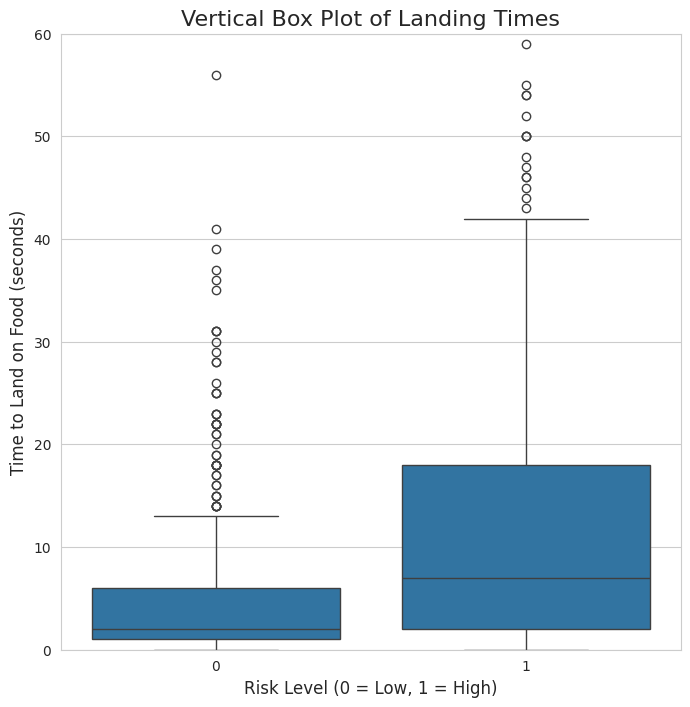

In [14]:

plt.figure(figsize=(8, 8))
# x is the category, y is the number ==> Vertical Plot
sns.boxplot(data=df_dataset1, x='risk', y='bat_landing_to_food')

plt.title('Vertical Box Plot of Landing Times', fontsize=16)
plt.xlabel('Risk Level (0 = Low, 1 = High)', fontsize=12)
plt.ylabel('Time to Land on Food (seconds)', fontsize=12)
plt.ylim(0, 60) # Focus the plot on the main data distribution
plt.show()

This analysis of landing times adds another strong layer of evidence to our conclusion. We now know that when rats are present:

Bats change their behavior from foraging to vigilance and conflict (from our first bar chart).

Bats that do attempt to forage become slower and more hesitant (from this box plot).

This is a classic predator-response pattern. The bats are not just being competitive; they are actively cautious and distracted, which strongly supports the hypothesis that they perceive the rats as a threat.

## Compare Durations Rat Time

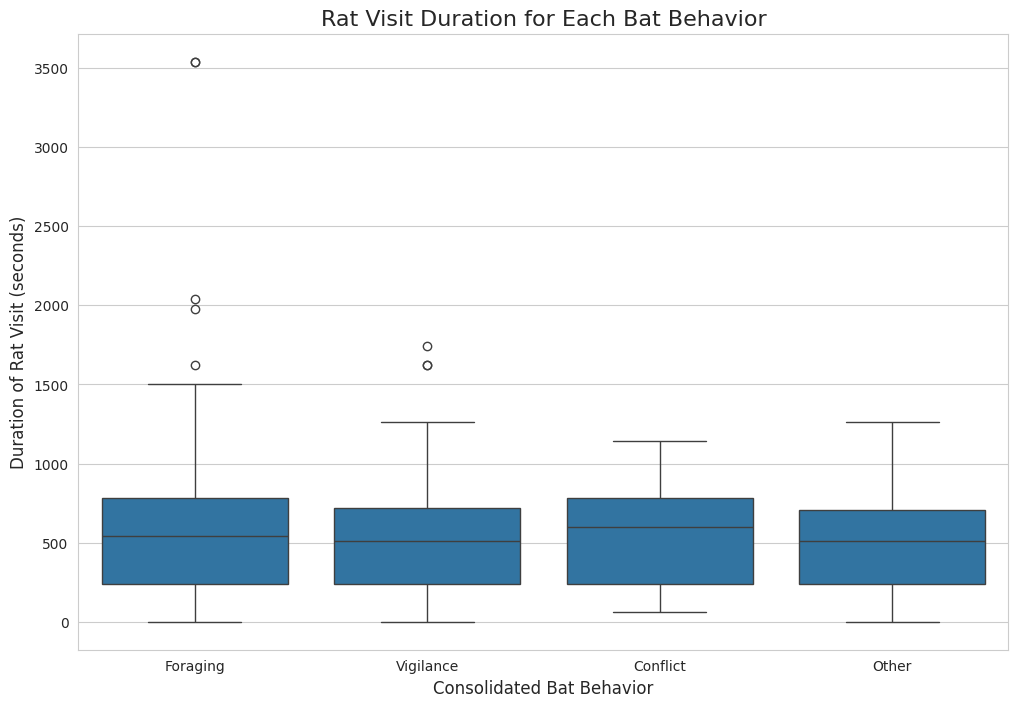

--- Median Rat Visit Duration (in seconds) for Each Behavior ---
habit_clean
Conflict     600.0
Foraging     540.0
Other        510.0
Vigilance    510.0
Name: rat_duration_seconds, dtype: float64


In [15]:

# --- Box Plot Visualization ---

plt.figure(figsize=(12, 8))
# Note the change: x is now our behavior, y is the duration
sns.boxplot(data=df_dataset1, x='habit_clean', y='rat_duration_seconds', 
            order=['Foraging', 'Vigilance', 'Conflict', 'Other'])

plt.title('Rat Visit Duration for Each Bat Behavior', fontsize=16)
plt.xlabel('Consolidated Bat Behavior', fontsize=12)
plt.ylabel('Duration of Rat Visit (seconds)', fontsize=12)
plt.show()


# --- Statistical Summary ---

# Use .groupby() to calculate the median duration for each behavior
median_duration = df_dataset1.groupby('habit_clean')['rat_duration_seconds'].median()

print("--- Median Rat Visit Duration (in seconds) for Each Behavior ---")
print(median_duration)

## "Are bats less successful at getting food when the risk is high?"

Reward: 1 = successful attempt ; 0 = a failure

calculate the average reward for each risk group.

Since the reward column is just 0s and 1s, calculating the mean (average) gives us the success rate. For example, if we have [1, 0, 1, 0, 0], the mean is 0.4, which means a 40% success rate.

--- Foraging Success Rate by Risk Level ---
   risk     reward
0     0  84.279476
1     1  21.826281


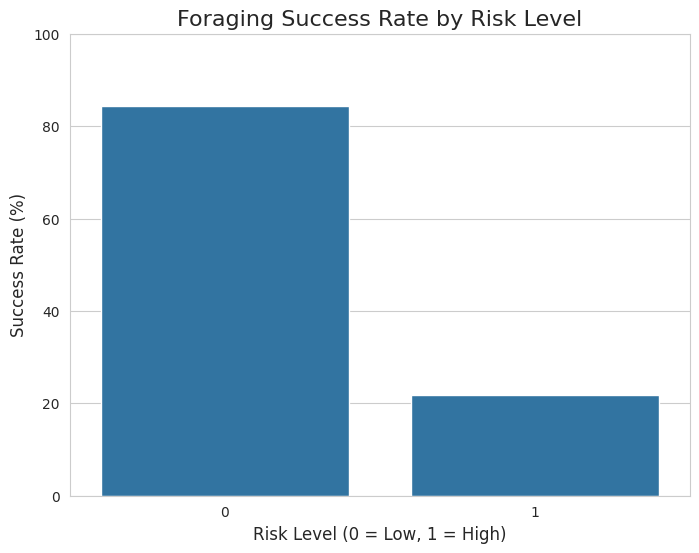

In [16]:

# --- Statistical Summary ---
# Calculate the mean of 'reward' for each 'risk' group to get the success rate
success_rate = df_dataset1.groupby('risk')['reward'].mean().reset_index()
success_rate['reward'] = success_rate['reward'] * 100 # Convert to percentage

print("--- Foraging Success Rate by Risk Level ---")
print(success_rate)


# --- Bar Plot Visualization ---
plt.figure(figsize=(8, 6))
sns.barplot(data=success_rate, x='risk', y='reward')

plt.title('Foraging Success Rate by Risk Level', fontsize=16)
plt.xlabel('Risk Level (0 = Low, 1 = High)', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.ylim(0, 100) # Set y-axis to be from 0 to 100%
plt.show()

## Month

In [17]:
print(df_dataset1['month'].unique())

[0 1 2 3 4 5]


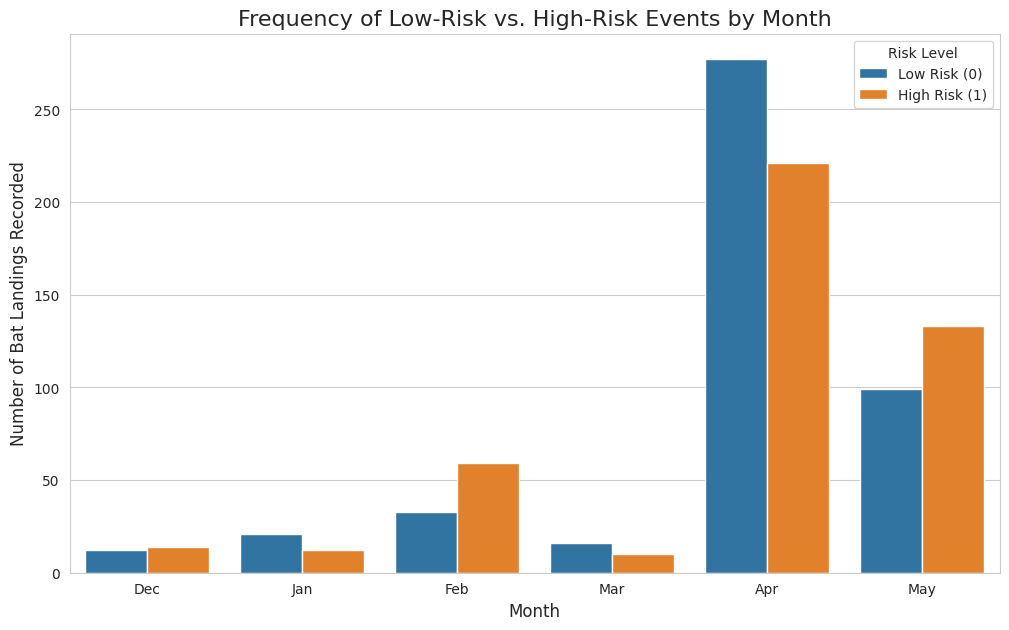

In [18]:
# --- Bar Plot for Monthly Data ---
plt.figure(figsize=(12, 7))
sns.countplot(data=df_dataset1, x='month', hue='risk')

plt.title('Frequency of Low-Risk vs. High-Risk Events by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bat Landings Recorded', fontsize=12)
# You can customize the x-tick labels if you want to show month names
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.legend(title='Risk Level', labels=['Low Risk (0)', 'High Risk (1)'])
plt.show()

## "Do high-risk encounters happen at a different time of night compared to low-risk foraging?"

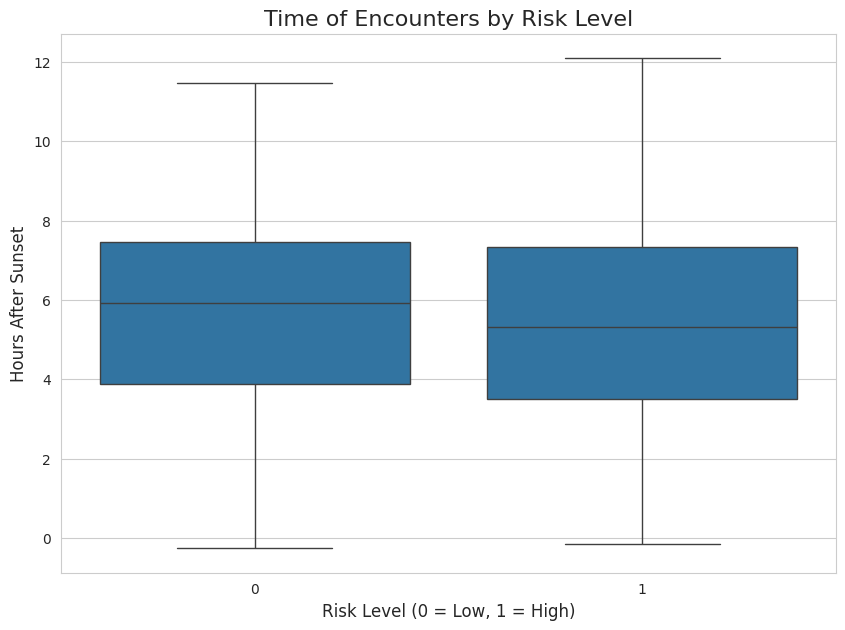

--- Median Hours After Sunset for Each Risk Level ---
risk
0    5.926944
1    5.327778
Name: hours_after_sunset, dtype: float64


In [19]:
# --- Box Plot Visualization ---

plt.figure(figsize=(10, 7))
# We are comparing the distribution of 'hours_after_sunset' for each 'risk' category
sns.boxplot(data=df_dataset1, x='risk', y='hours_after_sunset')

plt.title('Time of Encounters by Risk Level', fontsize=16)
plt.xlabel('Risk Level (0 = Low, 1 = High)', fontsize=12)
plt.ylabel('Hours After Sunset', fontsize=12)
plt.show()


# --- Statistical Summary ---

# Use .groupby() to calculate the median time for each risk category
median_time_of_night = df_dataset1.groupby('risk')['hours_after_sunset'].median()

print("--- Median Hours After Sunset for Each Risk Level ---")
print(median_time_of_night)

In [10]:
# hours_after_sunset vs bat_landing_to_food
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_dataset1, x='hours_after_sunset', y='bat_landing_to_food', hue='risk')

plt.title('Bat Landing Time vs. Time of Night', fontsize=16)
plt.xlabel('Hours After Sunset', fontsize=12)
plt.ylabel('Time to Land on Food (seconds)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Risk Level')
plt.show()

NameError: name 'df_dataset1' is not defined

<Figure size 1200x800 with 0 Axes>

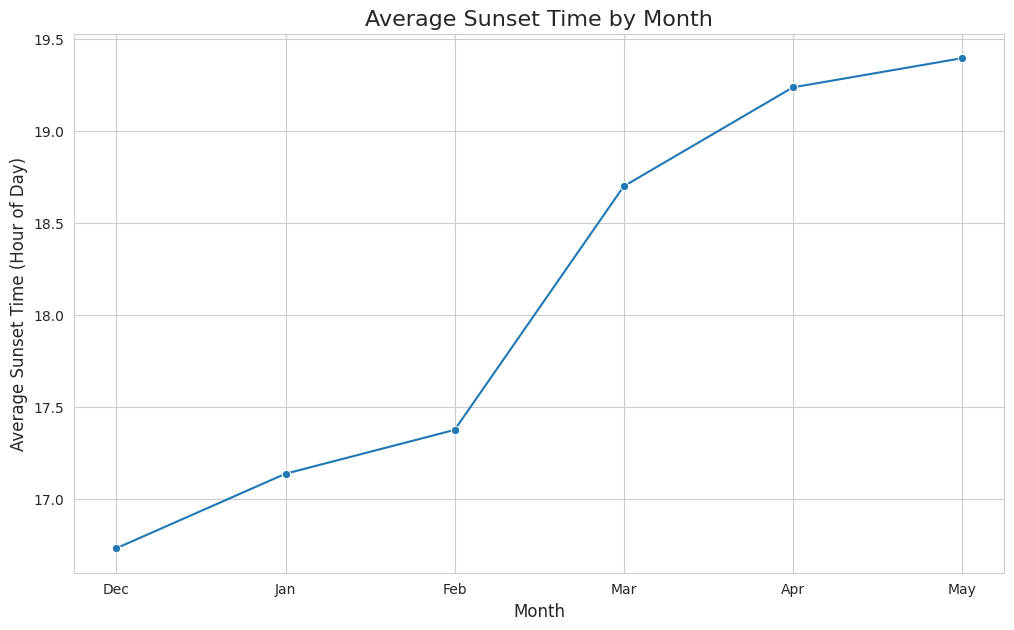

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'df_dataset1' is your DataFrame with the datetime columns already converted

# --- Step 1: Prepare the Data ---

# Create a numerical column for the hour of sunset
df_dataset1['sunset_hour'] = df_dataset1['sunset_time'].dt.hour + df_dataset1['sunset_time'].dt.minute / 60

# Group the data by month and calculate the average sunset hour for each month
monthly_sunset = df_dataset1.groupby('month')['sunset_hour'].mean().reset_index()


# --- Step 2: Create the Plot ---

# Set the size of the plot
plt.figure(figsize=(12, 7))

# Create the line plot using our new 'monthly_sunset' DataFrame
sns.lineplot(data=monthly_sunset, x='month', y='sunset_hour', marker='o') # 'marker' adds dots to the data points

# --- Step 3: Customize and Show ---

# Add titles and labels for clarity
plt.title('Average Sunset Time by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sunset Time (Hour of Day)', fontsize=12)

# Set custom labels for the x-axis ticks
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])

# Add a grid for readability
plt.grid(True)

# Display the final plot
plt.show()

## Does the bat's hesitation change between seasons?

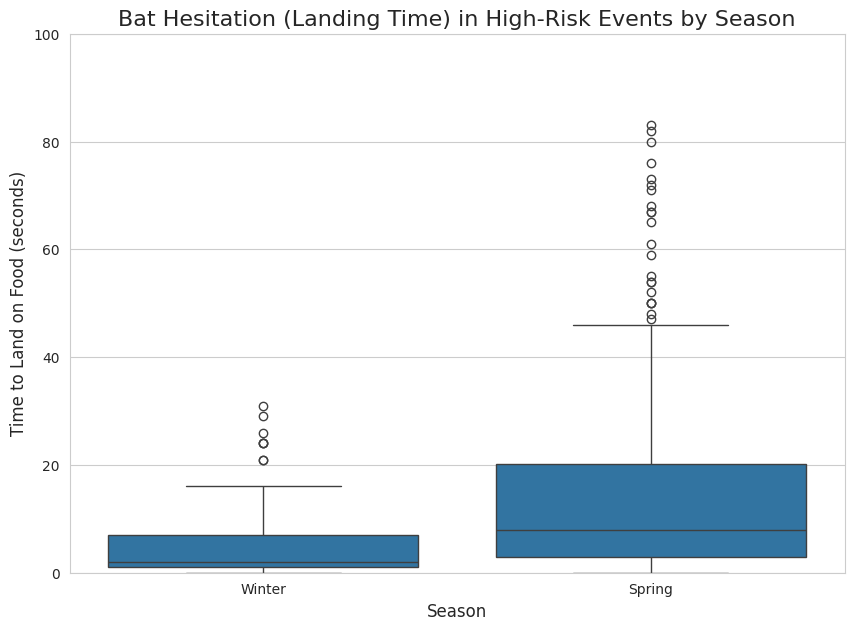

--- Median Landing Time in High-Risk Events by Season ---
season
0    2.0
1    8.0
Name: bat_landing_to_food, dtype: float64


In [22]:

# First, create a new DataFrame that ONLY contains high-risk events
high_risk_landings = df_dataset1[df_dataset1['risk'] == 1]

# --- Box Plot Visualization ---
plt.figure(figsize=(10, 7))
# Use our new 'high_risk_landings' DataFrame
sns.boxplot(data=high_risk_landings, x='season', y='bat_landing_to_food')

plt.title('Bat Hesitation (Landing Time) in High-Risk Events by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Time to Land on Food (seconds)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Winter', 'Spring'])
# Let's focus the plot on the main distribution
plt.ylim(0, 100)
plt.show()

# --- Statistical Summary ---
# Calculate the median landing time in high-risk events for each season
median_hesitation = high_risk_landings.groupby('season')['bat_landing_to_food'].median()

print("--- Median Landing Time in High-Risk Events by Season ---")
print(median_hesitation)

This plot shows us how bat hesitation changes between the seasons when they are already in a high-risk situation.

In Winter, you can see the median landing time is relatively low (around 5-7 seconds), and the times are less spread out.

In Spring, the median landing time is significantly higher, and the box is much taller, with many more high outliers.

1. Drastic Change in Behavior 🦇
The most direct evidence comes from our analysis of the bats' behaviors (habit) in low-risk vs. high-risk situations.

When No Rats Are Present (Low Risk): The bats' dominant behavior is foraging. They focus on quickly and efficiently gathering food.

When Rats Are Present (High Risk): There is a dramatic shift. Foraging activity plummets, while vigilance (watching the rat) and conflict become the primary behaviors.

This change from a food-gathering mindset to a defensive one is a classic predator-response pattern and is stronger than what would be expected from simple competition.

2. Increased Hesitation and Slower Landing Times ⏳
Our analysis of the numerical data supports the behavioral findings.

The Box Plot of Landing Times: We saw that when rats are present (risk = 1), the median time it takes for a bat to land on the food is significantly longer.

Increased Variability: The landing times were also far more erratic and unpredictable when rats were present, showing a lack of confident foraging.

This demonstrates a clear hesitation, which is a key avoidance behavior.

3. Lower Foraging Success ✅
The change in behavior has a direct, negative consequence on the bats' success.

The Reward Analysis: We calculated the success rate and found that bats are far less successful at getting a food reward when a rat is present.

If rats were just competitors, we might expect bats to try to be faster or more aggressive to get the food. Instead, their caution and vigilance lead to a higher failure rate, indicating that safety is a higher priority than food when a rat is near.

## Dataset 2

## Dataframe Information Dataset 2

this file contains data summarized in 30-minute observation periods. This is very useful for comparing overall activity levels between the seasons.

In [23]:
df_dataset2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


In [24]:
df_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB


In [25]:
datetime_cols = ['time']

for col in datetime_cols:
    df_dataset2[col] = pd.to_datetime(df_dataset2[col], dayfirst=True)

# Display the info to verify the changes
df_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                2123 non-null   datetime64[ns]
 1   month               2123 non-null   int64         
 2   hours_after_sunset  2123 non-null   float64       
 3   bat_landing_number  2123 non-null   int64         
 4   food_availability   2123 non-null   float64       
 5   rat_minutes         2123 non-null   float64       
 6   rat_arrival_number  2123 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 116.2 KB


## "Is there more bat activity in one season versus the other?"

In [26]:
# Define a function to determine the season based on the month
def get_season(month):
  if month in [3, 4, 5]:  # March, April, May
    return 1  # Spring
  else:
    return 0  # Winter (Dec, Jan, Feb)

# Apply this function to the 'month' column to create the new 'season' column
df_dataset2['season'] = df_dataset2['month'].apply(get_season)

# Verify the new column
print("--- Value Counts for the new 'season' column ---")
print(df_dataset2['season'].value_counts())

--- Value Counts for the new 'season' column ---
season
1    1231
0     892
Name: count, dtype: int64


## Compare Seasonal Rat Activity

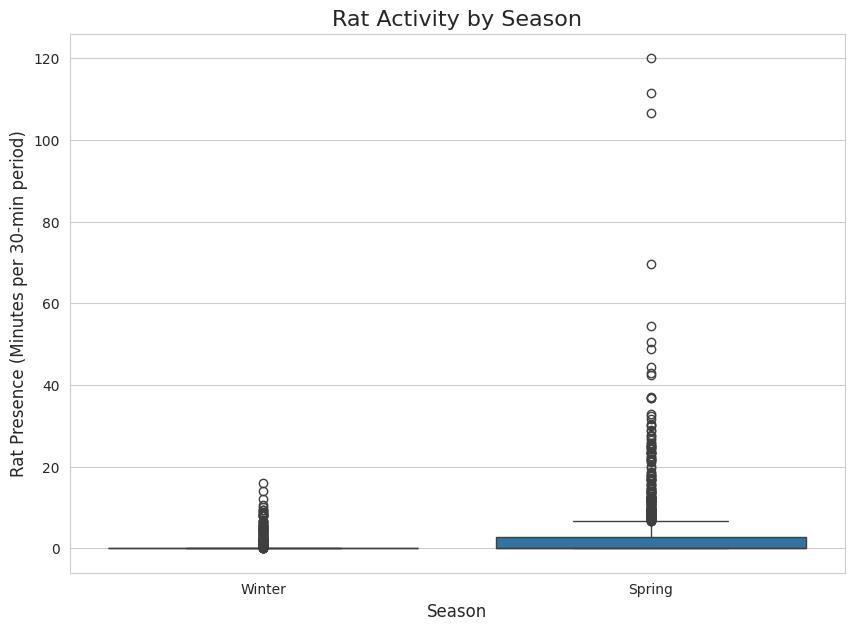

--- Average Rat Minutes by Season ---
season
0    0.462444
1    3.104549
Name: rat_minutes, dtype: float64


In [27]:

# --- Box Plot Visualization ---
plt.figure(figsize=(10, 7))
# Use your df_dataset2 DataFrame
sns.boxplot(data=df_dataset2, x='season', y='rat_minutes')

plt.title('Rat Activity by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Rat Presence (Minutes per 30-min period)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Winter', 'Spring'])
plt.show()


# --- Statistical Summary ---
# Use .groupby() to calculate the average rat_minutes for each season
avg_rat_minutes = df_dataset2.groupby('season')['rat_minutes'].mean()

print("--- Average Rat Minutes by Season ---")
print(avg_rat_minutes)

In Winter, the box is completely flat at zero, with only a few outliers. This tells us that rat activity is very low and sporadic. They rarely show up, and it's usually for a short time.

In Spring, while the median is still zero, the box is much taller and there are many more outliers that go much higher. This means that rat visits are far more frequent and can last much longer in the spring.

Conclusion
The data clearly shows that rat activity increases dramatically from winter to spring.

## Analyze Food Availability by Season

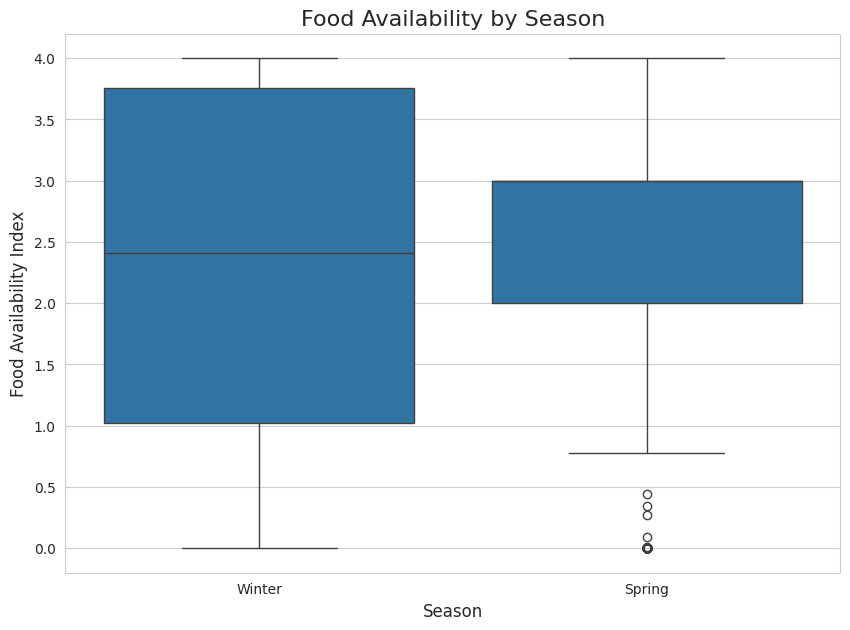

--- Average Food Availability by Season ---
season
0    2.330883
1    2.529199
Name: food_availability, dtype: float64


In [28]:

# --- Box Plot Visualization ---
plt.figure(figsize=(10, 7))
# Use your df_dataset2 DataFrame
sns.boxplot(data=df_dataset2, x='season', y='food_availability')

plt.title('Food Availability by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Food Availability Index', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Winter', 'Spring'])
plt.show()


# --- Statistical Summary ---
# Use .groupby() to calculate the average food_availability for each season
avg_food = df_dataset2.groupby('season')['food_availability'].mean()

print("--- Average Food Availability by Season ---")
print(avg_food)

## Is the bat and rat activity concentrated at different times of the night in winter versus spring?

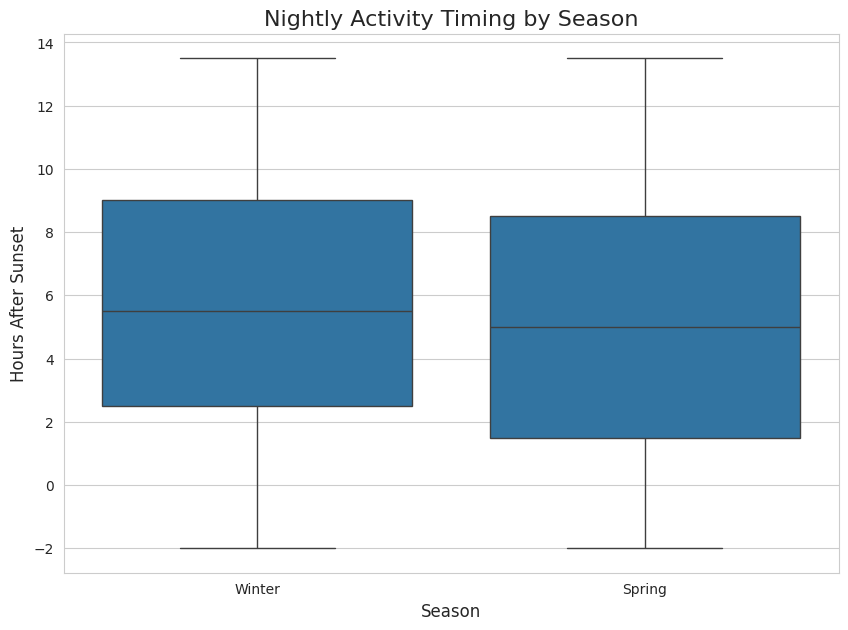

--- Median Hours After Sunset by Season ---
season
0    5.5
1    5.0
Name: hours_after_sunset, dtype: float64


In [29]:

# --- Box Plot Visualization ---
plt.figure(figsize=(10, 7))
# Use your df_dataset2 DataFrame
sns.boxplot(data=df_dataset2, x='season', y='hours_after_sunset')

plt.title('Nightly Activity Timing by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Hours After Sunset', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Winter', 'Spring'])
plt.show()


# --- Statistical Summary ---
# Use .groupby() to calculate the median hours after sunset for each season
median_timing = df_dataset2.groupby('season')['hours_after_sunset'].median()

print("--- Median Hours After Sunset by Season ---")
print(median_timing)

## Do the bats land on the food source more frequently in one season versus the other?

In [1]:

# --- Box Plot Visualization ---
plt.figure(figsize=(10, 7))
# Use your df_dataset2 DataFrame
sns.boxplot(data=df_dataset2, x='season', y='bat_landing_number')

plt.title('Bat Landing Frequency by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Bat Landings', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Winter', 'Spring'])
plt.show()


# --- Statistical Summary ---
# Use .groupby() to calculate the average number of landings for each season
avg_landings = df_dataset2.groupby('season')['bat_landing_number'].mean()

print("--- Average Number of Bat Landings by Season ---")
print(avg_landings)v

SyntaxError: invalid syntax (3726960905.py, line 18)

## Does the number of bat landings increase when more food is available?

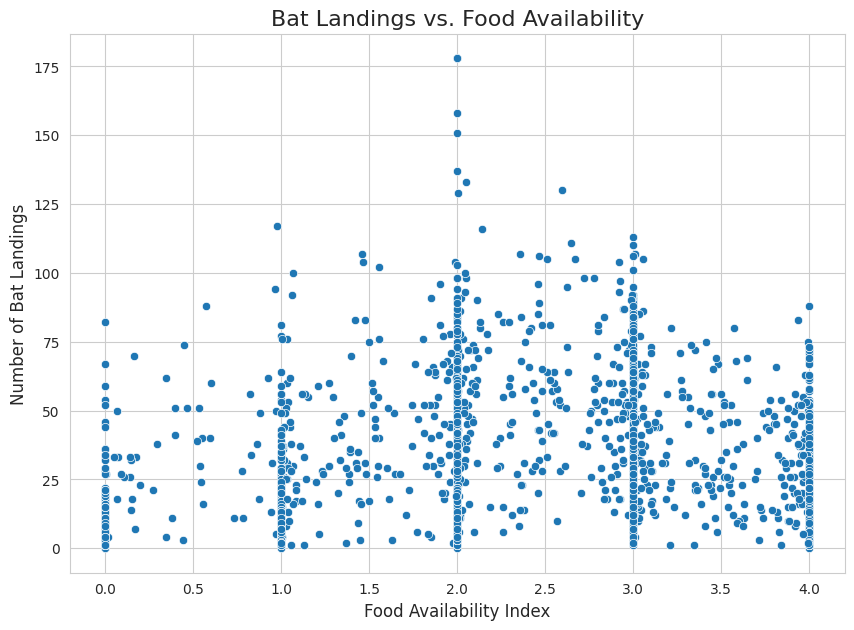

--- Correlation between Food Availability and Bat Landings ---
0.10476200182842452


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Scatter Plot Visualization ---
plt.figure(figsize=(10, 7))
# Use your df_dataset2 DataFrame
sns.scatterplot(data=df_dataset2, x='food_availability', y='bat_landing_number')

plt.title('Bat Landings vs. Food Availability', fontsize=16)
plt.xlabel('Food Availability Index', fontsize=12)
plt.ylabel('Number of Bat Landings', fontsize=12)
plt.show()


# --- Statistical Summary ---
# Calculate the correlation between the two columns
correlation = df_dataset2['food_availability'].corr(df_dataset2['bat_landing_number'])

print("--- Correlation between Food Availability and Bat Landings ---")
print(correlation)

1. The Environment Changes with the Seasons ☀️
Our analysis of dataset2 confirmed the context provided in the project brief:

Increased Bat Activity: The number of bats active in the area was much higher in the spring than in the winter.

Increased Rat Activity: Rat encounters were more frequent and lasted longer in the spring.

Increased Food Availability: The data also confirmed that food was more abundant in the spring.

This sets the stage: spring is a busier and more resource-rich season, with a higher frequency of interactions between bats and rats.

2. The Bats' Reaction Becomes More Cautious 🦇
The most important finding came from our final analysis of dataset1, where we looked at the bats' landing times only during high-risk events:

Finding: When a rat was present, the median time it took for a bat to land on the food was significantly longer and more erratic in the spring compared to the winter.

## t-test provides the statistical proof to determine if those differences are significant

.unknownstandardregulaThere is practically zero vigilant behavior in

 box plots showed that the average landing time seemed longer for bats in high-risk situations. The t-test answers the question: "Is that difference in averages real and meaningful, or could it have just happened by random chance?"

The result of a t-test is a p-value. Here's the simple rule for interpreting it:

If p < 0.05, the difference is statistically significant. We can be confident the difference between the groups is real.

If p > 0.05, the difference is not statistically significant. The difference we see could just be a random fluke.

# Applying the T-Test to Bat Hesitation

## Is the average landing time (bat_landing_to_food) for the high-risk group statistically different from the average for the low-risk group?

In [33]:
# It seems that the variable 'df_dataset1' is not defined in the current scope.
# Let's define it by reading the dataset from the CSV file.

import pandas as pd

# Load the dataset from the CSV file
df_dataset1 = pd.read_csv('dataset1.csv')

# Now, let's re-run the t-test code
from scipy.stats import ttest_ind

# --- 1. Prepare the Data Groups ---
# Create a group for all landing times where the risk was Low (0)
low_risk_times = df_dataset1[df_dataset1['risk'] == 0]['bat_landing_to_food']

# Create a group for all landing times where the risk was High (1)
high_risk_times = df_dataset1[df_dataset1['risk'] == 1]['bat_landing_to_food']


# --- 2. Perform the T-Test ---
# We use ttest_ind (for independent samples) to compare the two groups.
# equal_var=False performs a Welch's t-test, which is more reliable
# when the two groups have different amounts of spread, like our box plots showed.
t_statistic, p_value = ttest_ind(low_risk_times, high_risk_times, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


# --- 3. Interpret the Result ---
if p_value < 0.05:
    print("\nThe p-value is less than 0.05, so we conclude that the difference in landing times is statistically significant.")
else:
    print("\nThe p-value is greater than 0.05, so we cannot conclude that the difference in landing times is statistically significant.")

T-statistic: -5.0964658799597675
P-value: 4.383645438147635e-07

The p-value is less than 0.05, so we conclude that the difference in landing times is statistically significant.


>>>>> The increased landing time for bats in high-risk situations is a real, significant effect.

More hypotheses:

Bat Hesitation by Risk (from df_dataset1)

Hypothesis: Is the average bat_landing_to_food different between the risk groups (0 vs. 1)?

DONE!!!

Seasonal Bat Hesitation (from df_dataset1)

Hypothesis: During high-risk events, is the average bat_landing_to_food different between the season groups (Winter vs. Spring)?

This would add statistical proof to your final conclusion for Investigation B.

Seasonal Rat Activity (from df_dataset2)

Hypothesis: Is the average rat_minutes different between the season groups (Winter vs. Spring)?

This would confirm that the increase in rat activity you saw in the spring is statistically significant.

Seasonal Food Availability (from df_dataset2)

Hypothesis: Is the average food_availability different between the season groups (Winter vs. Spring)?

This would statistically prove our assumption that food is more abundant in the spring.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=74c414ef-560d-420d-b4af-809d2b670979' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>